# Matrix configuration of interest

Change these parameter values to whatever matrix you're interested in

In [207]:
testList = [
    (3,5),
    (3,10),
    (3,20),
    (5,5),
    (5,10),
    (5,20),
    (10,5),
    (10,10),
    (10,20),
]

tstIdx =0

candidates = testList[tstIdx][0]
voters: int = testList[tstIdx][1]
tvaType = "BTVA"

# Load in data

In [208]:
# Load data
import pickle

import pandas as pd
df : pd.DataFrame

with open(f"tt/testOutput{tvaType}.pkl", "rb") as file:
    df = pickle.load(file)

In [209]:
df

,input,voting_scheme,happiness_measure,happiness_values,risk_measure,risk_values
0,"[[B, D, D, A, B], [A, C, A, B, D], [E, B, E, D...",Anti-plurality voting,NDCG,"[0.8174935137996165, 0.3424985031845269, 0.397...",Winner change risk,0.165414
0,"[[C, E, D, D, A], [A, A, B, B, C], [B, C, E, E...",Anti-plurality voting,NDCG,"[0.6074915180456525, 0.6074915180456525, 0.369...",Winner change risk,0.169231
0,"[[E, B, B, D, B], [C, E, A, C, D], [A, A, E, E...",Anti-plurality voting,NDCG,"[0.8400079830158563, 0.8174935137996165, 0.789...",Winner change risk,0.163793
0,"[[C, D, A, E, C, A, B, C, E, B, B, D, C, A, A,...",Anti-plurality voting,NDCG,"[0.894999002123018, 0.5250049893849101, 0.1324...",Winner change risk,0.000000
0,"[[C, D, E, B, E, E, C, D, D, A, C, B, B, B, C,...",Anti-plurality voting,NDCG,"[0.36999401273810767, 0.8174935137996165, 0.81...",Winner change risk,0.000000
...,...,...,...,...,...,...
0,"[[A, B, E, F, H, D, J, E, B, E, J, F, F, E, H,...",Plurality voting,Get Happiness,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",Happiness Weighted PSV,0.000000
0,"[[I, J, I, C, D, D, H, C, G, E, D, D, H, D, H,...",Plurality voting,Get Happiness,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, ...",Happiness Weighted PSV,0.000000
0,"[[F, H, B, A, H, C, B, F, I, H], [D, B, C, J, ...",Plurality voting,Get Happiness,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 1]",Happiness Weighted PSV,0.000000
0,"[[E, C, A, D, H, I, H, D, B, G], [J, B, F, E, ...",Plurality voting,Get Happiness,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]",Happiness Weighted PSV,0.000000


In [ ]:
# Change happiness_measure value 'Bubble sort distance / Kendall Tau Distance' to 'Bubble sort'
df["happiness_measure"] = df["happiness_measure"].replace("Bubble sort distance / Kendall Tau Distance", "Bubble sort")
df["happiness_measure"] = df["happiness_measure"].replace("Get Happiness", "Top-1 binary")
df["risk_measure"] = df["risk_measure"].replace("Naive Probability of Strategic Voting", "Naive PSV")
df["risk_measure"] = df["risk_measure"].replace("Happiness Weighted PSV", "HW PSV")


# Preload df

In [211]:
# Drop rows on column input, with shapes that are not (candidates, voters)
df = df[df.input.apply(lambda x: x.shape == (candidates, voters))]

In [212]:
df

,input,voting_scheme,happiness_measure,happiness_values,risk_measure,risk_values
0,"[[C, A, C, B, B], [A, B, B, A, C], [B, C, A, C...",Anti-plurality voting,NDCG,"[0.23981246656813146, 0.8597186998521972, 0.47...",Winner change risk,0.00000
0,"[[C, A, C, A, A], [A, B, B, B, C], [B, C, A, C...",Anti-plurality voting,NDCG,"[0.4796249331362629, 1.0, 0.23981246656813146,...",Winner change risk,0.00000
0,"[[A, B, A, B, A], [B, C, B, A, B], [C, A, C, C...",Anti-plurality voting,NDCG,"[0.8597186998521972, 0.7601875334318685, 0.859...",Winner change risk,0.25000
0,"[[C, A, C, B, B], [A, B, B, A, C], [B, C, A, C...",Anti-plurality voting,NDCG,"[0.23981246656813146, 0.8597186998521972, 0.47...",Flip Reward,0.25325
0,"[[C, A, C, A, A], [A, B, B, B, C], [B, C, A, C...",Anti-plurality voting,NDCG,"[0.4796249331362629, 1.0, 0.23981246656813146,...",Flip Reward,0.25325
...,...,...,...,...,...,...
0,"[[C, A, C, A, A], [A, B, B, B, C], [B, C, A, C...",Plurality voting,Top-1 binary,"[0, 1, 0, 1, 1]",Naive PSV,0.00000
0,"[[A, B, A, B, A], [B, C, B, A, B], [C, A, C, C...",Plurality voting,Top-1 binary,"[1, 0, 1, 0, 1]",Naive PSV,0.00000
0,"[[C, A, C, B, B], [A, B, B, A, C], [B, C, A, C...",Plurality voting,Top-1 binary,"[0, 0, 0, 1, 1]",HW PSV,0.00000
0,"[[C, A, C, A, A], [A, B, B, B, C], [B, C, A, C...",Plurality voting,Top-1 binary,"[0, 1, 0, 1, 1]",HW PSV,0.00000


# Hapiness

In [213]:
# Drop columns
df_happiness = df.drop(columns=["risk_measure", "risk_values"])

# Convert the happiness values list to an average value
df_happiness["happiness_values_avg"] = df_happiness["happiness_values"].apply(lambda x: sum(x) / len(x))

# Drop duplicates based on the matrix column
df_happiness["input_str"] = df_happiness["input"].apply(lambda x: str(x))
df_happiness = df_happiness.drop_duplicates(subset=["input_str", "voting_scheme", "happiness_measure"])
df_happiness = df_happiness.drop(columns=["input_str"])

In [214]:
df_happiness.head()

,input,voting_scheme,happiness_measure,happiness_values,happiness_values_avg
0,"[[C, A, C, B, B], [A, B, B, A, C], [B, C, A, C...",Anti-plurality voting,NDCG,"[0.23981246656813146, 0.8597186998521972, 0.47...",0.667869
0,"[[C, A, C, A, A], [A, B, B, B, C], [B, C, A, C...",Anti-plurality voting,NDCG,"[0.4796249331362629, 1.0, 0.23981246656813146,...",0.695925
0,"[[A, B, A, B, A], [B, C, B, A, B], [C, A, C, C...",Anti-plurality voting,NDCG,"[0.8597186998521972, 0.7601875334318685, 0.859...",0.867869
0,"[[C, A, C, B, B], [A, B, B, A, C], [B, C, A, C...",Anti-plurality voting,Kendall Tau,"[0.33333333333333337, 0.33333333333333337, 0.0...",0.400000
0,"[[C, A, C, A, A], [A, B, B, B, C], [B, C, A, C...",Anti-plurality voting,Kendall Tau,"[0.0, 1.0, 0.33333333333333337, 1.0, 0.3333333...",0.533333


<h3> Boxplot </h3>
Schema's avg values

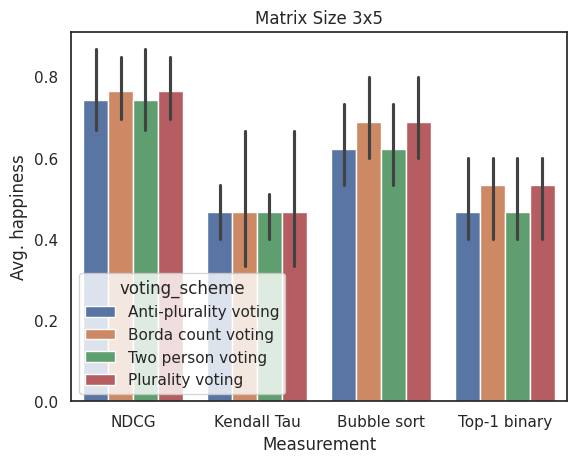

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
avgHappinessPlt = sns.barplot(x='happiness_measure', y='happiness_values_avg', hue='voting_scheme', data=df_happiness)
avgHappinessPlt.set(
    title=f'Matrix Size {candidates}x{voters}',
    xlabel='Measurement',
    ylabel='Avg. happiness'
    )

avgHappinessPlt.get_figure().savefig(f"[{tvaType}] avgHappiness ({candidates}c{voters}v).png", transparent=True)

<h3> Boxplot </h3>
Voter specific values

In [216]:
# Explode df on hapiness values
df_happiness = df_happiness.explode("happiness_values")

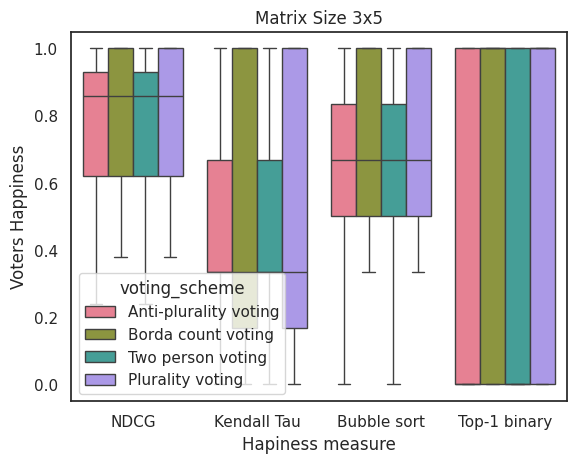

In [217]:
# create 3rd grouped boxplot 
happinessPlot = sns.boxplot(x = df_happiness['happiness_measure'], 
			y = df_happiness['happiness_values'], 
			hue = df_happiness['voting_scheme'], 
			palette = 'husl')
happinessPlot.set(
    title=f'Matrix Size {candidates}x{voters}',
    xlabel='Hapiness measure',
    ylabel='Voters Happiness'
    )

happinessPlot.get_figure().savefig(f"[{tvaType}] Happiness ({candidates}c{voters}v).png", transparent=True)


# Risk

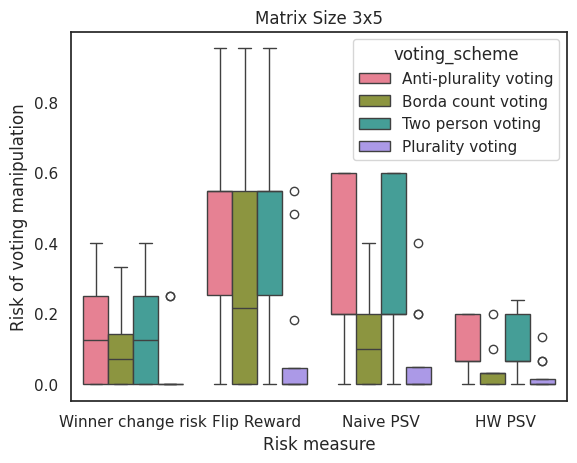

In [218]:
# create 3rd grouped boxplot 
riskPlot = sns.boxplot(x = df['risk_measure'], 
			y = df['risk_values'], 
			hue = df['voting_scheme'], 
			palette = 'husl')

riskPlot.set(
    title=f'Matrix Size {candidates}x{voters}',
    xlabel='Risk measure',
    ylabel='Risk of voting manipulation'
    )

riskPlot.get_figure().savefig(f"[{tvaType}] risk ({candidates}c{voters}v).png", transparent=True)